In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn as sk
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.layers import Lambda, Dense, Flatten
from keras.models import Model
from glob import glob
import PIL
from PIL import Image
import os
import cv2
import random 

In [2]:
Train_path = './Dog and Cat/Train'
Test_path = './Dog and Cat/Test'
Image_size = [224,224]

In [3]:
folder = glob(Train_path)

In [4]:
Train_generator  = ImageDataGenerator(rescale = 1./25, shear_range=0.2,zoom_range = 0.2, horizontal_flip = True)
Test_generator = ImageDataGenerator(rescale = 1./25)

In [5]:
training_set = Train_generator.flow_from_directory('./Dog and Cat/Train',
                                                   color_mode='rgb',
                                                   shuffle=True,
                                                   target_size=(224,224),
                                                   batch_size=32,
                                                   class_mode= 'binary')
testing_set = Test_generator.flow_from_directory('./Dog and Cat/Test',
                                                 color_mode='rgb',
                                                 shuffle=True,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode= 'binary')

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [6]:
def view_random_image(target_dir,target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder +'/'+ random_image[0 ])  
    plt.imshow(img)
    plt.title(target_class)
    
    return img

In [7]:
vgg = VGG19(input_shape=Image_size + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False
x = Flatten()(vgg.output) 
prediction = Dense(len(folder), activation='sigmoid')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [8]:
vgg.input.shape

TensorShape([None, 224, 224, 3])

In [9]:
prediction.shape

TensorShape([None, 1])

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(training_set, validation_data= testing_set, epochs = 5
                    
                    , batch_size=64
                    )

Epoch 1/5
25/25 [==============================] - 352s 14s/step - loss: 0.2609 - accuracy: 0.8825 - val_loss: 0.1195 - val_accuracy: 0.9550
Epoch 2/5
25/25 [==============================] - 355s 14s/step - loss: 0.0716 - accuracy: 0.9750 - val_loss: 0.0757 - val_accuracy: 0.9650
Epoch 3/5
25/25 [==============================] - 353s 14s/step - loss: 0.0379 - accuracy: 0.9900 - val_loss: 0.0726 - val_accuracy: 0.9650
Epoch 4/5
25/25 [==============================] - 349s 14s/step - loss: 0.0265 - accuracy: 0.9937 - val_loss: 0.0668 - val_accuracy: 0.9650
Epoch 5/5
25/25 [==============================] - 355s 14s/step - loss: 0.0173 - accuracy: 0.9975 - val_loss: 0.0590 - val_accuracy: 0.9700


In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

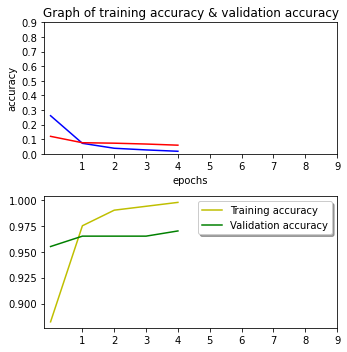

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 5))

# plot graph of training loss & validation loss
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 10, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.set_xlabel("epochs")
ax1.set_ylabel("loss")
ax1.set_title("Graph of training loss & validation loss")

# plot graph of training accuracy & validation accuracy
ax2.plot(history.history['accuracy'], color='y', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='g',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 10, 1))
ax1.set_xlabel("epochs")
ax1.set_ylabel("accuracy")
ax1.set_title("Graph of training accuracy & validation accuracy")

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

TEST OUR MODEL FOR CAT

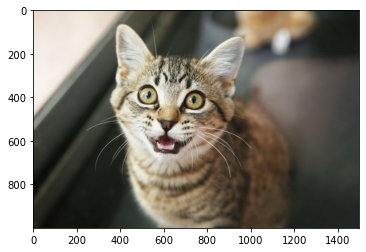

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
cat = mpimg.imread("los-10-sonidos-principales-del-gato-fa.jpg")
plt.imshow(cat)

In [42]:
cat.shape

(1000, 1499, 3)

In [43]:
def load_and_prep_image(filename,img_shape = 224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, size = [img_shape,img_shape])
    img = img/255.
    return img

In [44]:
cat1 = load_and_prep_image('los-10-sonidos-principales-del-gato-fa.jpg')
cat1

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.9022801 , 0.8356134 , 0.77286834],
        [0.90588236, 0.8392157 , 0.7764706 ],
        [0.9087535 , 0.84208685, 0.77934176],
        ...,
        [0.10196079, 0.10980392, 0.09019608],
        [0.10791226, 0.11575539, 0.09614755],
        [0.10814007, 0.11537956, 0.09396077]],

       [[0.9070903 , 0.84042364, 0.77767855],
        [0.9098039 , 0.84313726, 0.78039217],
        [0.9098039 , 0.84313726, 0.78039217],
        ...,
        [0.10407858, 0.11192172, 0.09231388],
        [0.09943672, 0.10727987, 0.08767202],
        [0.10393839, 0.11117788, 0.09157003]],

       [[0.9037728 , 0.8410277 , 0.7782826 ],
        [0.9119135 , 0.8413253 , 0.7864233 ],
        [0.9137255 , 0.84313726, 0.7882353 ],
        ...,
        [0.08989008, 0.10949792, 0.08596851],
        [0.09755784, 0.10540097, 0.08579313],
        [0.09916493, 0.10740691, 0.08700139]],

       ...,

       [[0.15824576, 0.16216733, 0.13200277],
        [0.15

In [45]:
pred = model.predict(tf.expand_dims(cat1, axis=0))
pred

1/1 [==============================] - 0s 422ms/step


array([[0.00194724]], dtype=float32)

In [46]:
import pathlib
data_dir = pathlib.Path('./Dog and Cat/Train')
class_name = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_name)

['Cat' 'Dog']


In [47]:
pred_class = class_name[int(tf.round(pred))]
pred_class

'Cat'

In [48]:
def pred_and_plot(model,filename,):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img,axis=0)) 
    pred_class = class_name[int(tf.round(pred))]
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')


1/1 [==============================] - 0s 436ms/step


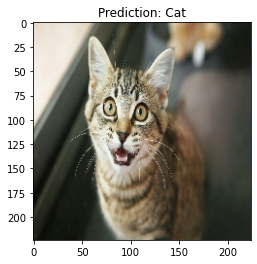

In [49]:
pred_and_plot(model,"los-10-sonidos-principales-del-gato-fa.jpg",)

Test Our Model For Dogs

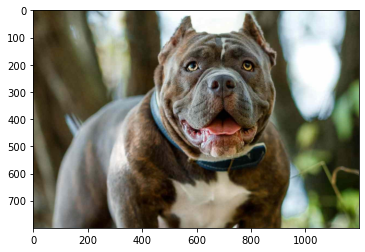

In [75]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
dog = mpimg.imread("img.jpg")
plt.imshow(dog)

In [76]:
dog.shape

(800, 1197, 3)

In [77]:
def load_and_prep_image(filename,img_shape = 224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, size = [img_shape,img_shape])
    img = img/255.
    return img

In [78]:
dog3 = load_and_prep_image('img.jpg')
dog3

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.23204657, 0.2045956 , 0.09367122],
        [0.24931723, 0.22186625, 0.11094187],
        [0.2677959 , 0.24034488, 0.12942052],
        ...,
        [0.24782914, 0.23606443, 0.16155463],
        [0.22857143, 0.21680672, 0.14229691],
        [0.22532387, 0.21355917, 0.13904937]],

       [[0.23585434, 0.21232493, 0.08683473],
        [0.23729867, 0.21376926, 0.08827906],
        [0.25379026, 0.23026086, 0.10477066],
        ...,
        [0.24658613, 0.23482142, 0.16031162],
        [0.24369748, 0.23193277, 0.15742296],
        [0.23766632, 0.22590162, 0.1513918 ]],

       [[0.21568628, 0.19076505, 0.06945028],
        [0.22781862, 0.20342262, 0.08053222],
        [0.2560312 , 0.23226541, 0.10748424],
        ...,
        [0.2467437 , 0.23497899, 0.16046919],
        [0.24481794, 0.23305324, 0.15854342],
        [0.24157038, 0.22980568, 0.15529588]],

       ...,

       [[0.2617384 , 0.25389525, 0.1715423 ],
        [0.28

In [79]:
pred3 = model.predict(tf.expand_dims(dog3, axis=0))
pred3

1/1 [==============================] - 1s 516ms/step


array([[0.8253304]], dtype=float32)

In [80]:
import pathlib
data_dir = pathlib.Path('./Dog and Cat/Train')
class_name1 = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_name1)

['Cat' 'Dog']


In [81]:
pred_class = class_name1[int(tf.round(pred3))]
pred_class

'Dog'

In [82]:
def pred_and_plot(model,filename,):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img,axis=0)) 
    pred_class = class_name[int(tf.round(pred3))]
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')

1/1 [==============================] - 1s 582ms/step


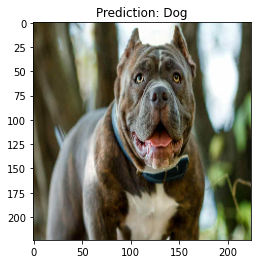

In [83]:
pred_and_plot(model,"img.jpg",)